In [36]:
# Import important library
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
gc=pd.read_csv('german_credit.csv')

In [3]:
gc.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
gc.shape

(1000, 21)

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
gc.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [13]:
train_df, test_df= train_test_split(gc,test_size=0.50,random_state=7)
train_df.shape

(500, 21)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

(500, 61)

In [17]:
gc_std=pd.get_dummies(train_df,drop_first=True)
x=gc_std.drop('default', axis=1)
y=gc_std['default']

### Check for highly correlated variables but don't required any treatment for this use case

In [32]:
gc_corr=gc_std.corr().abs()
gc_corr[gc_corr==1]=0
gc_corr.max().sort_values(ascending=False).head(6)


housing_rent                                                                  0.725358
housing_own                                                                   0.725358
credit_history_critical account/ other credits existing (not at this bank)    0.697982
credit_history_existing credits paid back duly till now                       0.697982
other_debtors_none                                                            0.674059
other_debtors_guarantor                                                       0.674059
dtype: float64

### Drop the original variables which are converted to dummy

done above

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [33]:
# splitting data into training and test set for independent attributes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [39]:
print("Train Accuracy Score :",rfcl.score(X_train , y_train))
y_predict = rfcl.predict(X_test)
print("Test Accuracy Score : ",rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_predict,y_test))

Train Accuracy Score : 1.0
Test Accuracy Score :  0.7333333333333333
[[98 35]
 [ 5 12]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       103
           1       0.71      0.26      0.37        47

   micro avg       0.73      0.73      0.73       150
   macro avg       0.72      0.60      0.60       150
weighted avg       0.73      0.73      0.69       150



### Q6 Show the list of the features importance( 1 Marks)

                                                    IMPORTANCE
FEATURE                                                       
credit_amount                                             0.13
duration_in_month                                         0.09
age                                                       0.09
account_check_status_no checking account                  0.06
installment_as_income_perc                                0.04
present_res_since                                         0.04
account_check_status_< 0 DM                               0.03
purpose_domestic appliances                               0.02
present_emp_since_4 <= ... < 7 years                      0.02
present_emp_since_1 <= ... < 4 years                      0.02
present_emp_since_... < 1 year                            0.02
savings_unknown/ no savings account                       0.02
savings_... < 100 DM                                      0.02
property_if not A121/A122 : car or other, not i...     

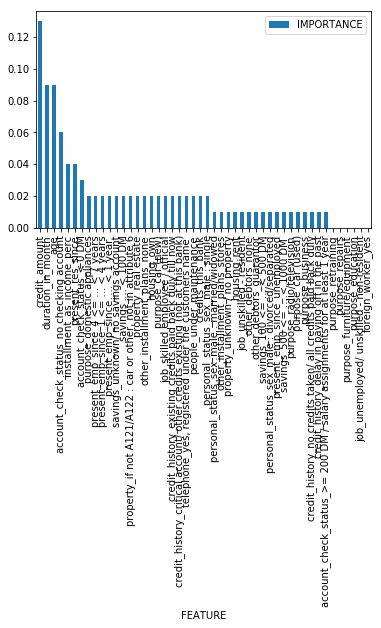

In [42]:
importances = pd.DataFrame({'FEATURE':X_train.columns,'IMPORTANCE':np.round(rfcl.feature_importances_,2)})
importances = importances.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
print(importances)
importances.plot.bar()
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [45]:
gc_df_dummy = pd.get_dummies(gc,drop_first = True)
#df_credit_dummy = pd.get_dummies(X)

# Generating X and the target y for our model
X_1 = gc_df_dummy.drop(labels= "default" , axis = 1)
y_1 = gc_df_dummy["default"]
print(gc_df_dummy.shape)

(1000, 49)


In [46]:
# splitting data into training and test set for independent attributes
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=.30, random_state=7)

In [47]:
rfcl1 = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl1 = rfcl1.fit(X1_train, y1_train)
y1_predict = rfcl1.predict(X1_test)

In [48]:
 kfold = KFold(n_splits=num_folds, random_state=seed)

In [49]:
cross_val_score(rfcl1, X_1, y_1, cv=kfold)

array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

In [0]:
#Calculate Mean score

In [51]:
np.mean(cross_val_score(rfcl1, X_1, y_1, cv=kfold))

0.767

In [0]:
# Calculate score standard deviation using std()

In [53]:
np.std(cross_val_score(rfcl1, X_1, y_1, cv=kfold))

0.057105166141076934

# Validation

In [55]:
cross_val_score(rfcl, x, y, cv=kfold)

Scores :
 [0.66 0.82 0.72 0.78 0.7  0.8  0.66 0.72 0.78 0.76]


In [56]:
np.mean(cross_val_score(rfcl, x, y, cv=kfold))

0.74

In [59]:
np.std(cross_val_score(rfcl, x, y, cv=kfold))

0.05366563145999495

# Q8 Print the confusion matrix( 1 Marks)

In [60]:
y1_pred = cross_val_predict(rfcl1, X_1, y_1, cv=10)
confusion_matrix(y1_pred,y_1)

array([[646, 187],
       [ 54, 113]], dtype=int64)

# for 50% dataset

In [62]:
y_pred = cross_val_predict(rfcl, x, y, cv=10)
confusion_matrix( y,y_pred)

array([[311,  32],
       [104,  53]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [63]:
print("classification_report entire dataset :\n",classification_report(y1_test, y1_predict))

classification_report entire dataset :
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       217
           1       0.70      0.42      0.53        83

   micro avg       0.79      0.79      0.79       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.78      0.79      0.77       300



In [64]:
print("classification_report 50% dataset :\n",classification_report(y_test, y_predict))

classification_report 50% dataset :
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       103
           1       0.71      0.26      0.37        47

   micro avg       0.73      0.73      0.73       150
   macro avg       0.72      0.60      0.60       150
weighted avg       0.73      0.73      0.69       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

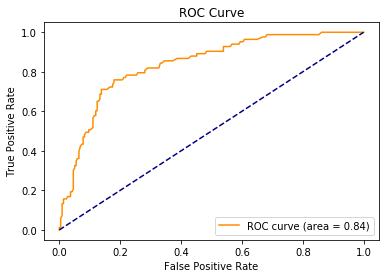

In [65]:
from sklearn.metrics import roc_curve
probs = rfcl1.predict_proba(X1_test)  
probs = probs[:, 1]  
fpr, tpr, thresholds = roc_curve(y1_test, probs)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
         
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# fo 50% dataset

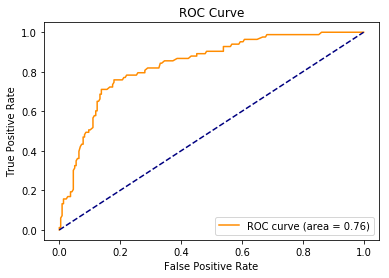

In [66]:
from sklearn.metrics import roc_curve
probs1 = rfcl.predict_proba(X_test)  
probs1 = probs1[:, 1]  
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, probs1)
roc_auc1 = metrics.auc(fpr_1, tpr_1)
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [67]:
metrics.auc(fpr,tpr)

0.8364610515795903

In [69]:
metrics.auc(fpr_1,tpr_1)

0.7606899400950218

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
